# Implementation of FIR Filter in the FPGA

In [1]:
import numpy as np
from numpy import savetxt, loadtxt
import matplotlib.pyplot as plt

In [47]:
# Let us generate a wave function with two main frequencies, an high one and a low one:

data_size = 125
noise = 1 # the higher the noisier
file = open("../signal.txt", "w")

input_sig = []

for i in range(data_size):
    sig = 62*(np.sin(i/(2*np.pi))+ noise)
    noise = -noise
    input_sig.append(sig.astype(int)) # we write it as an int
    file.write(str(sig.astype(int)))
    file.write('\n')

file.close()

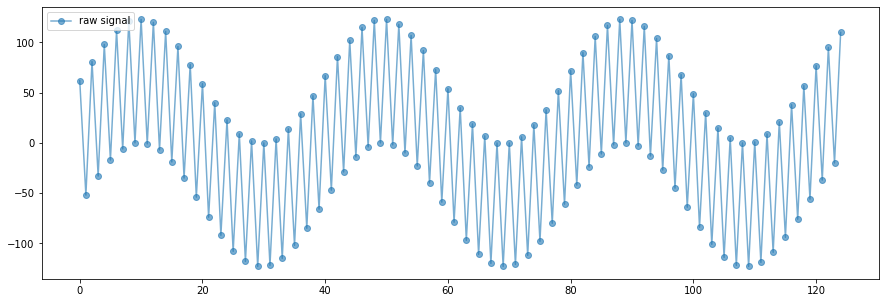

In [48]:
# Now we visualize it:
sig = np.loadtxt("../signal.txt", delimiter='\n')
t = np.arange(len(input_sig)) # array for the x coordinate, just for displaying

plt.figure(figsize=(15, 5))

plt.plot(t, sig, '-o',alpha=.6,label='raw signal')
plt.legend(loc="upper left")

In [29]:
# After being computed on the actual FPGA

In [49]:
# I just copied from the terminal, had some problems in reading from a file :/
fpga = [0,0,0,0,0,6,2,3,5,8,10,11,13,14,15,15,15,14,14,12,11,9,7,5,3,0,-2,-5,-7,-9,-11,-13,-14,-15,-16,-16,-16,-15,-14,-13,-11,-10,-7,-5,-3,0,2,4,7,9,10,12,13,14,15,15,15,14,13,12,10,8,6,4,1,-1,-4,-6,-8,-10,-12,-13,-15,-15,-16,-16,-16,-15,-14,-12,-10,-9,-6,-4,-2,1,3,6,8,10,11,13,14,15,15,15,14,14,12,11,9,7,5,2,0,-2,-5,-7,-9,-11,-13,-14,-15,-16,-16,-16,-15,-14,-13,-11,-10,-7,-5,-3,0]
for i in range(len(fpga)):
    # 2**10 due to truncation of bits
    # 2**9 because I multiplied the coefficients by 2**9
    fpga[i] = (2**10/2**8)*fpga[i]

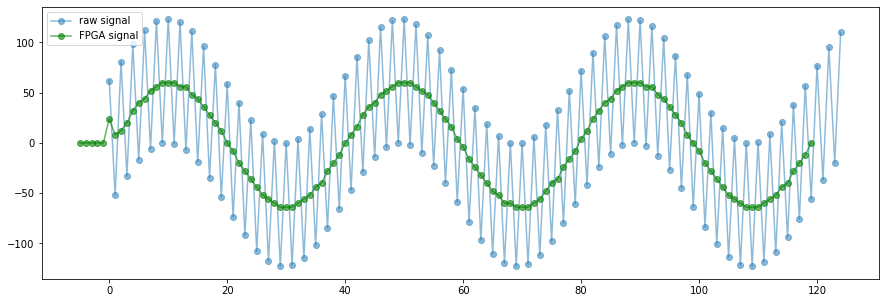

In [53]:
plt.figure(figsize=(15, 5))

t = np.arange(len(input_sig))
plt.plot(t, input_sig, '-o',alpha=.5,label='raw signal')
t = np.arange(len(fpga))
plt.plot(t-5, fpga, '-o', color='g',alpha=.6,label='FPGA signal')

#plt.title("")
#plt.xlim(0,200) #just for the latex report
plt.legend(loc="upper left")

In [2]:
def sine_wave(A, time, f): # creates a sine wave
    return A * np.sin(2 * np.pi * f * time)

In [52]:
data_size = 100

A1, A2, A3 = 100, 50, 1
f1, f2, f3 = 1, 20, 100

t = np.linspace(0, 100, data_size)

signal = sine_wave(A1, t, f1) + sine_wave(A2, t, f2)

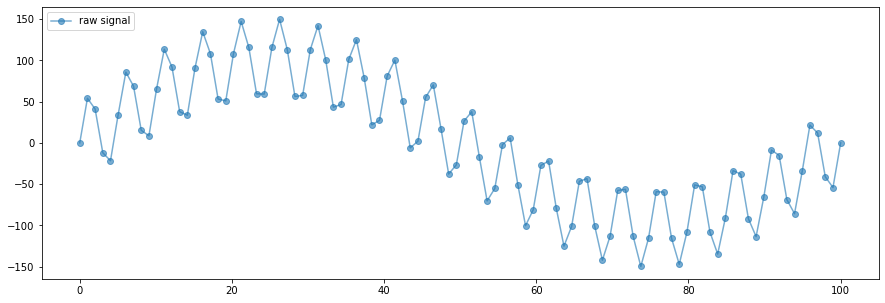

In [53]:
plt.figure(figsize=(15, 5))

plt.plot(t, signal, '-o',alpha=.6,label='raw signal')
plt.legend(loc="upper left")

In [47]:
np.savetxt('../signal.txt', signal, delimiter='\n', fmt='%d')

In [46]:
# After being computed on the actual FPGA